# Round 2

In [1]:
import pandas as pd

# Get Data

In [175]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Show DataFrame Shape

In [4]:
data.shape

(10910, 26)

# Standardize column names

In [5]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

print(data.columns)

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')


# Find numerical and categorical columns

In [6]:
data.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [7]:
data.select_dtypes(np.number)

<IPython.core.display.Javascript object>

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [8]:
data.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


# Locating and dealing with NaN values

In [9]:
data.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [10]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column

unnamed:_0                        0.00
customer                          0.00
state                             5.78
customer_lifetime_value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           5.80
months_since_policy_inception     0.00
number_of_open_complaints         5.80
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     5.70
vehicle_size                      5.70
vehicle_type             

In [11]:
data=data.drop(columns=['vehicle_type','unnamed:_0'])  # drop a column  vehicle_type missing 1/2 values
data=data.dropna()   # drop rows with nan values
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Datetime column

In [12]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])

In [13]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [14]:
data['month'] = data['effective_to_date'].dt.month
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


# BONUS create a function to clean dataframe

In [176]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [177]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['month'] = df['effective_to_date'].dt.month
    return df

In [178]:
data2 = clean_data(data)

In [180]:
data2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


# Round 3

## Continuing with data2 - cleaned dataframe

### describe the data

In [181]:
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [182]:
data2.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [183]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status  

## Import necessary libraries

In [184]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Plot total number of responses

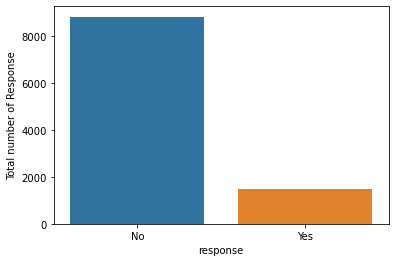

In [185]:
sns.countplot('response', data=data)
plt.ylabel('Total number of Response')
plt.show()

## Plot response rate by Sales Channel

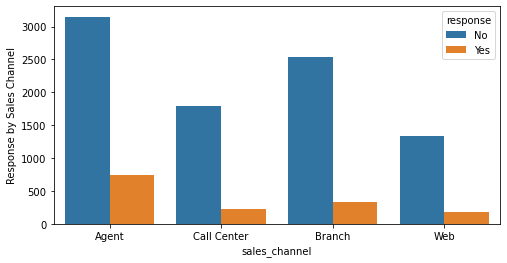

In [186]:
plt.figure(figsize=(8,4))
sns.countplot('sales_channel', hue='response', data=data)
plt.ylabel('Response by Sales Channel')
plt.show()

### This is a count of responses by channel, not the rate.
### I still need to create a rate column

In [187]:
data2['response_rate'] = np.where(data2.response=='Yes',1,0)

<IPython.core.display.Javascript object>

In [188]:
data2.response_rate.value_counts()

0    7826
1    1308
Name: response_rate, dtype: int64

### Use a groupby to create the rate

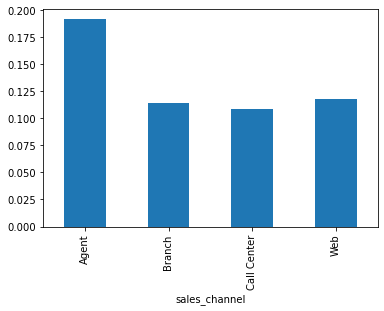

In [189]:
# found this code at https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14
data2.groupby('sales_channel')['response_rate'].mean().plot.bar()
plt.show()

### Response rate by Total Claim Amount

In [190]:
# data2.groupby('total_claim_amount')['response_rate'].mean().plot.bar()
# plt.show()

### Yuck.  Left this in so you could see the process.  Not a helpful graph!!

### I need to bin the total claim amounts -- too many unique values

In [191]:
data2['total_claim_amount'].max()

2893.239678

In [192]:
data2['total_claim_amount'].min()

0.09900700000000001

In [193]:
data2['total_claim_amount'].mean()

434.08879431289563

### Function to bin into categories

In [194]:
def tca_cat(x):
    if x <=450:
        return 1
    elif x<=900:
        return 2
    elif x<=1350:
        return 3
    elif x<=1800:
        return 4
    else:
        return 5
    
data2['total_claim_amount_bins'] = list(map(tca_cat, data2['total_claim_amount']))

data2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,response_rate,total_claim_amount_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0,1
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1,2
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1,0,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2,0,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1,0,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2,0,1


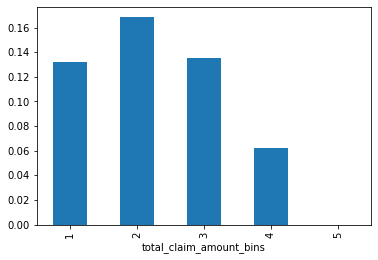

In [195]:
data2.groupby('total_claim_amount_bins')['response_rate'].mean().plot.bar()
plt.show()

### Changing x-tick labels

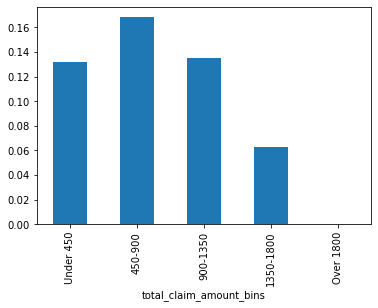

In [196]:
fig, ax = plt.subplots()
data2.groupby('total_claim_amount_bins')['response_rate'].mean().plot.bar()
labels=['Under 450','450-900','900-1350','1350-1800','Over 1800']
# read the documentation for correct syntax
ax.set_xticklabels(x='total_claim_amount_bins',labels=labels,rotation='vertical')
plt.show()

### Same binning issue as total claim amount

In [197]:
data2['income'].max()

99981

In [198]:
data2['income'].min()

0

In [199]:
data2['income'].mean()

37657.38000875848

In [200]:
def income_cat(x):
    if x <20000:
        return 1
    elif x<40000:
        return 2
    elif x<60000:
        return 3
    elif x<80000:
        return 4
    else:
        return 5
    
data2['income_bins'] = list(map(income_cat, data2['income']))

data2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,response_rate,total_claim_amount_bins,income_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0,1,3
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0,2,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0,2,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1,2,3
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1,0,1,3
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2,0,2,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1,0,1,4
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2,0,1,2


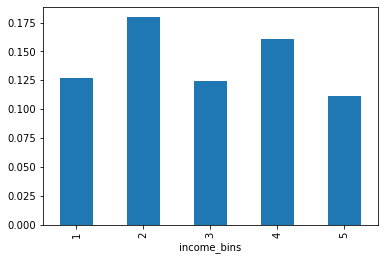

In [201]:
data2.groupby('income_bins')['response_rate'].mean().plot.bar()
plt.show()

### Changing x-tick labels

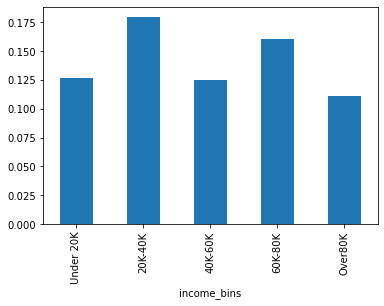

In [202]:
fig, ax = plt.subplots()
data2.groupby('income_bins')['response_rate'].mean().plot.bar()
labels=['Under 20K','20K-40K','40K-60K','60K-80K','Over80K']
# read the documentation for correct syntax
ax.set_xticklabels(x='income_bins',labels=labels,rotation='vertical')
plt.show()

# Round 4

### Separating numerical and categorical data

In [203]:
data2.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [204]:
numerical = data2.select_dtypes(np.number)
numerical

<IPython.core.display.Javascript object>

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate,total_claim_amount_bins,income_bins
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0,1,3
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0,2,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1,2,3
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1,0,1,3
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2,0,2,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0,1,4
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0,1,2


In [205]:
categorical = data2.select_dtypes(object)
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


### Looking at distributions

In [206]:
#sns.pairplot(data2)

In [207]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'response_rate', 'total_claim_amount_bins', 'income_bins'],
      dtype='object')

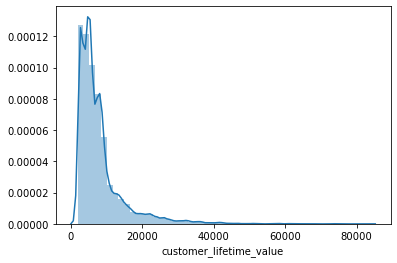

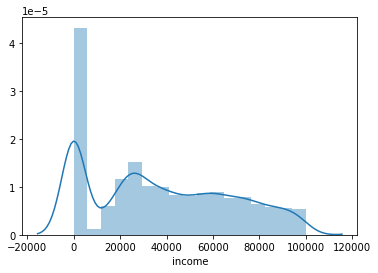

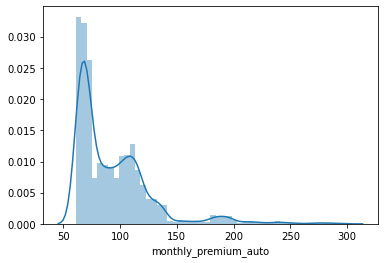

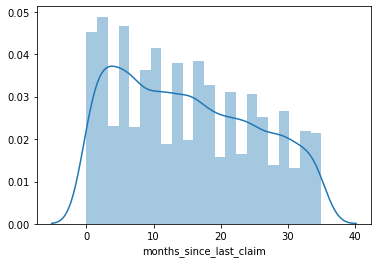

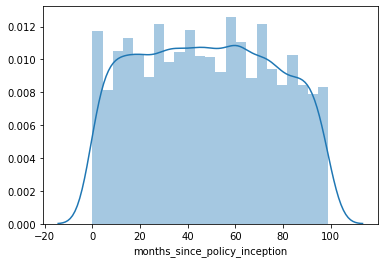

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


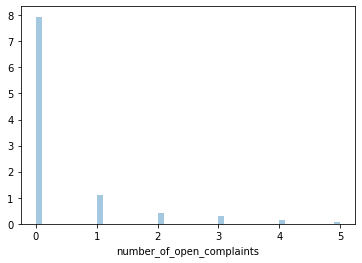

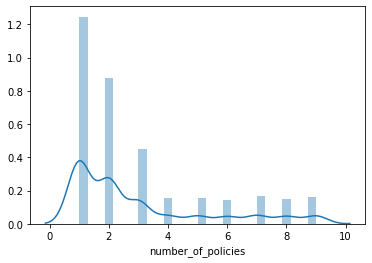

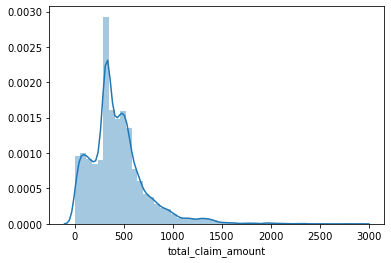

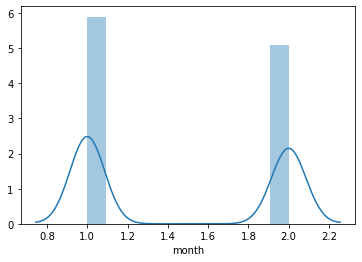

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


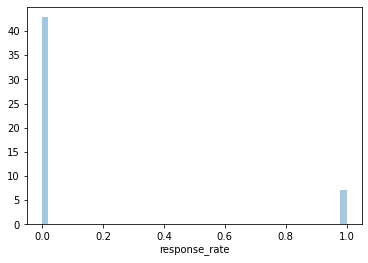

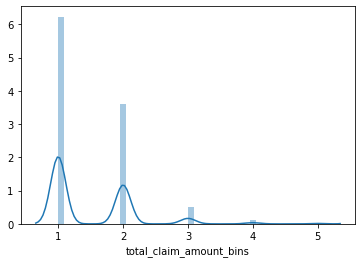

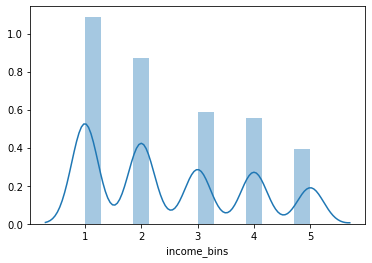

In [208]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

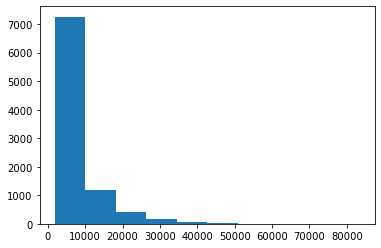

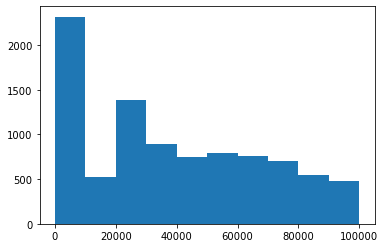

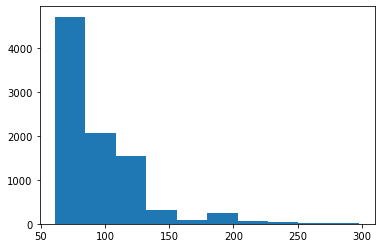

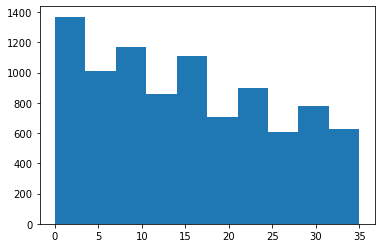

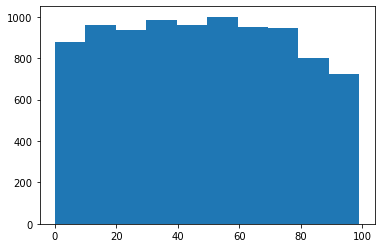

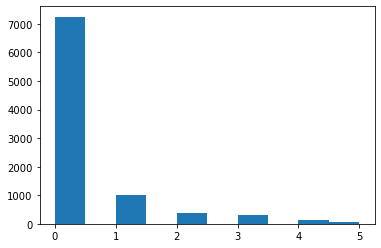

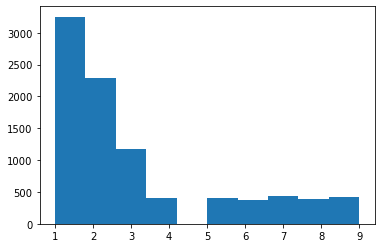

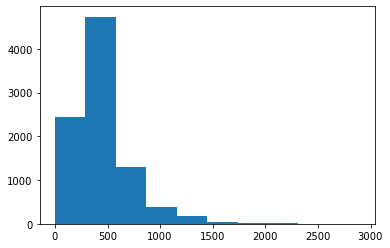

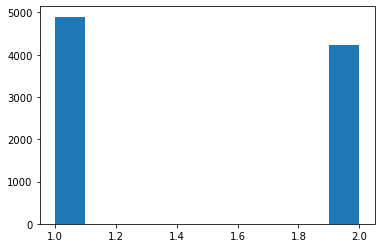

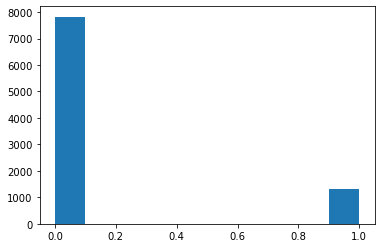

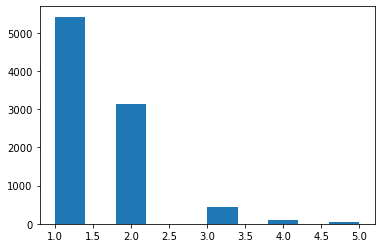

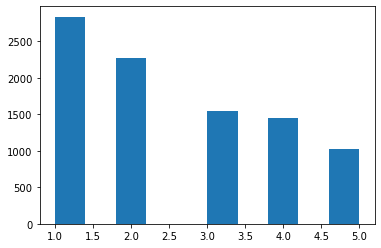

In [209]:
fig, ax = plt.subplots()
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.show()

### Check for Multi-collinearity

In [210]:
correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate,total_claim_amount_bins,income_bins
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096,-0.008930,0.236394,0.024024
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169,0.011932,-0.313194,0.979159
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467,0.010966,0.642667,-0.018358
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921,-0.016597,0.014558,-0.032048
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010,0.002952,0.001155,0.003599
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335,-0.009881,-0.024583,0.008051
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305,-0.020891,-0.004080,-0.009076
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820,0.016877,0.898683,-0.343675
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000,-0.034221,0.008446,-0.005412
response_rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,-0.034221,1.000000,0.012828,-0.006683


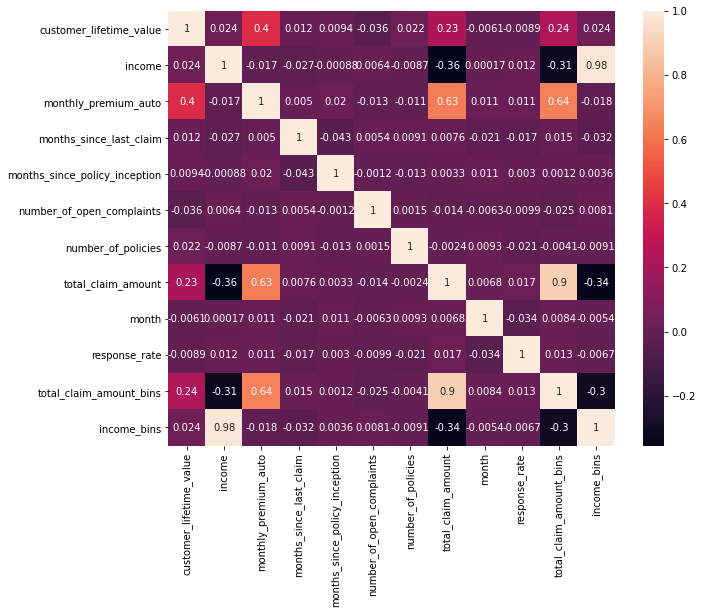

In [211]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

### I can see that the columns I created have made a high collinearity with the original columns.  I will now drop the new columns


In [212]:
numerical = numerical.drop(columns=['total_claim_amount_bins','income_bins'], axis=1)

numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2,0
...,...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1,0
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0


In [213]:
data2 = data2.drop(columns = ['total_claim_amount_bins','income_bins'], axis=1)
data2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,response_rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1,0
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2,0


### Looking at heatmap again

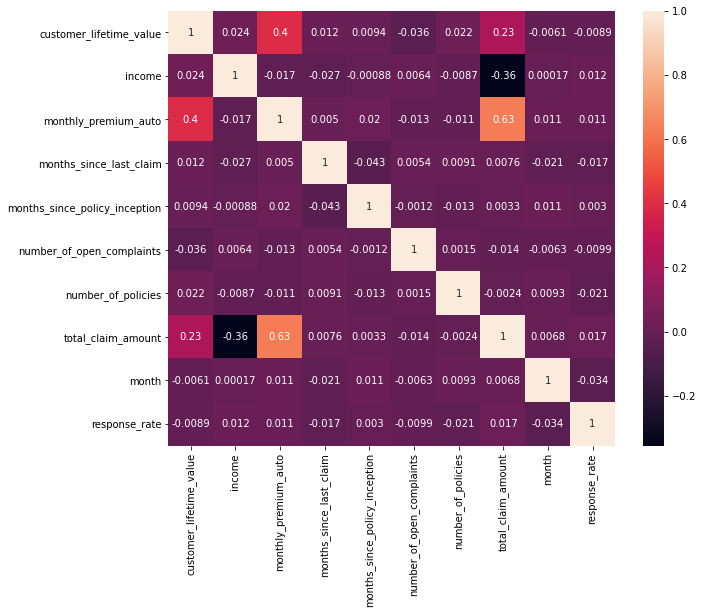

In [214]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

# Round 5

### Processing for the X y split
### X=features  y=target

In [215]:
X=data2.drop('total_claim_amount', axis=1)
y=data2.total_claim_amount

### Drop some useless columns

In [216]:

X=X.drop(columns=['customer', 'effective_to_date','month','response_rate'],axis=1)

### Again separating numerical and categorical

In [217]:
X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns)

print (X.shape, X_num.shape, X_cat.shape)  # check shape

(9134, 21) (9134, 7) (9134, 14)


### Take a look at the numerical data

In [218]:
X_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


### Import Libraries

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Scaling using MinMax

In [220]:
# good for counts
transformer = MinMaxScaler().fit(X_num)
X_norm = transformer.transform(X_num)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375


### Scaling Standard Scaler

In [221]:
# good for measurements
transformer = StandardScaler().fit(X_num)
X_standard = transformer.transform(X_num)
print(X_standard.shape)
X_num_standard = pd.DataFrame(X_standard, columns=X_num.columns)
X_num_standard.head()

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247
4,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555


# Round 6

### One hot encode the categorical data

In [222]:
from sklearn.preprocessing import OneHotEncoder

In [223]:
# Create encoder to be used on new data later.
encoder = OneHotEncoder(drop='first').fit(X_cat)

# Need to get column names. Trying a few different ways.

#cols = [col_name for row in encoder.categories_ for col_name in row[1::]]

"""
cols = []
for row in encoder.categories_|:
        for col_name in row[1::]:
             cols.append(col_name)
"""


cols = encoder.get_feature_names(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### concat numerical and categorical transformations for features

In [224]:
X=pd.concat([X_num_scale, X_cat_encode], axis=1) 
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Test Train Split

In [225]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)

### Train and run model

In [226]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model training
y_pred_linreg=linreg.predict(X_test)   # model prediction

### Validation R2 scores

In [227]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.7745558949837812 -- test R2: 0.7633920747478495


### Mean Squared Error

In [228]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 18643.232228684985 -- test MSE: 21521.366432149556


### Root Mean Squared Error

In [229]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 136.54022201785446 -- test RMSE: 146.7016238224702


### Mean Absolute Error

In [230]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 18643.232228684985 -- test MAE: 21521.366432149556


## Try to improve the model

### Using Standard Scaler instead of MinMax

In [231]:
X2=pd.concat([X_num_standard, X_cat_encode], axis=1) 
X2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [232]:
X_train, X_test, y_train, y_test=tts(X2, y, test_size=.2) 

#new test train split with new X2 value of Standard Scaler.

In [233]:
linreg=LinReg()    # model -- Have already made this could have just used the variable, but copied the entire cell
linreg.fit(X_train, y_train)   # model training
y_pred_linreg=linreg.predict(X_test)   # model prediction

In [234]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.7690539828846107 -- test R2: 0.7844139281142721


### Changing the test size

In [235]:
X_train, X_test, y_train, y_test=tts(X2, y, test_size=.15)

In [236]:
linreg=LinReg()    # model -- Same for this model
linreg.fit(X_train, y_train)   # model training
y_pred_linreg=linreg.predict(X_test)   # model prediction

In [237]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.7763923734486862 -- test R2: 0.7522257304794178
